In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = pd.read_table('/datacommons/igvf-pm/A549/GR-AP1/simulated-seq/data/exp-fit-1/train-lognormal10-1-counts.txt.gz')

# Create a distribution plot
sns.set(style="whitegrid")
sns.histplot(data['RNA=1'], kde=True, color="blue", bins=30)

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution Plot")

# Show plot
plt.show()
data.loc[data['RNA=1']<0,]

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = pd.read_table('/datacommons/igvf-pm/A549/GR-AP1/simulated-seq/data/exp-fit-1/all-train-0.005-counts.txt.gz')
print('number of samples with negative score before biased downsampling:',len(data.loc[data['RNA=1']<0,]))
data = pd.read_table('/datacommons/igvf-pm/A549/GR-AP1/simulated-seq/data/exp-fit-1/train-lognormal10-1-counts.txt.gz')
print('number of samples with negative score after biased downsampling by lognormal^10:',len(data.loc[data['RNA=1']<0,]))
data = pd.read_table('/datacommons/igvf-pm/A549/GR-AP1/simulated-seq/data/exp-fit-1/train-bluestarr-2-counts.txt.gz')
print('number of samples with negative score after biased downsampling by bluestarr:',len(data.loc[data['RNA=1']<0,]))
data = pd.read_table('/datacommons/igvf-pm/A549/GR-AP1/simulated-seq/data/exp-fit-1/train-bluestarr-3-counts.txt.gz')
print('number of samples with negative score after biased downsampling by bluestarr:',len(data.loc[data['RNA=1']<0,]))

number of samples with negative score before biased downsampling: 11818
number of samples with negative score after biased downsampling by lognormal^10: 0
number of samples with negative score after biased downsampling by bluestarr: 5029
number of samples with negative score after biased downsampling by bluestarr: 5404


In [5]:
5029/len(data)*100

0.2958235294117647

In [ ]:
from scipy.stats import lognorm
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000 
x = list(data['RNA=1'])
y = list(lognorm.cdf(x, s=1, scale=1))
plt.plot(x, y, label="Lognormal CDF")
plt.axvline(0, color="red", linestyle="--", label="x = 0")
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("Lognormal CDF (s=1, scale=1)")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Linear Scale Activation Function')

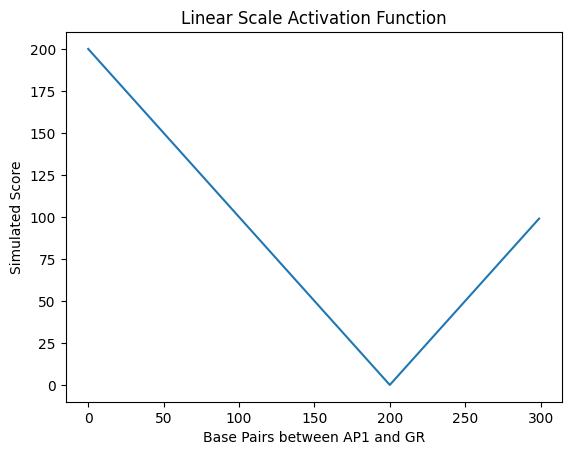

In [5]:
import numpy as np
def activation_score(dist, peak_dist=200, score_ceiling=200, offset=0, log_scale=False):
    score = np.fmin(np.abs(peak_dist - dist), score_ceiling)
    if log_scale:
        score = np.log2(np.fmax(score, 1))
        if offset != 0:
            offset = np.log2(np.abs(offset)) * np.sign(offset)
    return score + offset
import matplotlib.pyplot as plt
dists = np.arange(0,300,1)
scores = activation_score(dists)
plt.plot(dists, scores)
plt.xlabel("Base Pairs between AP1 and GR")
plt.ylabel("Simulated Score")
plt.title('Linear Scale Activation Function')

In [19]:
from tqdm import tqdm
for i in tqdm(range(1, 1065)):
    with open('/hpc/group/igvf/K562/CRE-preds/preds/pred'+str(i)+'.txt', 'r') as file:
        for line in file:
            # line = line.decode("utf-8")
            # if line.startswith("#") == False:
            record = line.strip().split("\t")
            ref = record[3]
            if ref == 'ref=N':
                print(i)
                print(record)


  7%|▋         | 72/1064 [04:05<36:02,  2.18s/it]  

73
['chr1:248752384-248752668', 'chr1:248752376-248752676', 'pos=248752513', 'ref=N', 'G', '-0.44669437']
73
['chr1:248752384-248752668', 'chr1:248752376-248752676', 'pos=248752513', 'ref=N', 'C', '-0.44455266']
73
['chr1:248752384-248752668', 'chr1:248752376-248752676', 'pos=248752513', 'ref=N', 'A', '-0.44537336']
73
['chr1:248752384-248752668', 'chr1:248752376-248752676', 'pos=248752513', 'ref=N', 'T', '-0.45251486']


  8%|▊         | 86/1064 [04:18<17:08,  1.05s/it]

87
['chr10:58267889-58268237', 'chr10:58267913-58268213', 'pos=58267942', 'ref=N', 'G', '0.3942747']
87
['chr10:58267889-58268237', 'chr10:58267913-58268213', 'pos=58267942', 'ref=N', 'C', '0.39986765']
87
['chr10:58267889-58268237', 'chr10:58267913-58268213', 'pos=58267942', 'ref=N', 'A', '0.4010433']
87
['chr10:58267889-58268237', 'chr10:58267913-58268213', 'pos=58267942', 'ref=N', 'T', '0.3834594']


 10%|█         | 107/1064 [05:04<31:24,  1.97s/it]  

107
['chr10:124122217-124122566', 'chr10:124122241-124122541', 'pos=124122245', 'ref=N', 'G', '0.16132393']
107
['chr10:124122217-124122566', 'chr10:124122241-124122541', 'pos=124122245', 'ref=N', 'C', '0.15624386']
107
['chr10:124122217-124122566', 'chr10:124122241-124122541', 'pos=124122245', 'ref=N', 'A', '0.13822487']
107
['chr10:124122217-124122566', 'chr10:124122241-124122541', 'pos=124122245', 'ref=N', 'T', '0.14325574']
107
['chr10:124122217-124122566', 'chr10:124122241-124122541', 'pos=124122267', 'ref=N', 'G', '0.13097402']
107
['chr10:124122217-124122566', 'chr10:124122241-124122541', 'pos=124122267', 'ref=N', 'C', '0.14820531']
107
['chr10:124122217-124122566', 'chr10:124122241-124122541', 'pos=124122267', 'ref=N', 'A', '0.13581273']
107
['chr10:124122217-124122566', 'chr10:124122241-124122541', 'pos=124122267', 'ref=N', 'T', '0.29025325']


 17%|█▋        | 186/1064 [10:45<59:05,  4.04s/it]  

187
['chr12:132222440-132222788', 'chr12:132222464-132222764', 'pos=132222633', 'ref=N', 'G', '-0.14051685']
187
['chr12:132222440-132222788', 'chr12:132222464-132222764', 'pos=132222633', 'ref=N', 'C', '-0.12600651']
187
['chr12:132222440-132222788', 'chr12:132222464-132222764', 'pos=132222633', 'ref=N', 'A', '-0.14502938']
187
['chr12:132222440-132222788', 'chr12:132222464-132222764', 'pos=132222633', 'ref=N', 'T', '-0.13240126']


 30%|██▉       | 319/1064 [16:28<24:25,  1.97s/it]  

320
['chr17:83126238-83126430', 'chr17:83126184-83126484', 'pos=83126309', 'ref=N', 'G', '0.056209177']
320
['chr17:83126238-83126430', 'chr17:83126184-83126484', 'pos=83126309', 'ref=N', 'C', '0.045215398']
320
['chr17:83126238-83126430', 'chr17:83126184-83126484', 'pos=83126309', 'ref=N', 'A', '0.039073393']
320
['chr17:83126238-83126430', 'chr17:83126184-83126484', 'pos=83126309', 'ref=N', 'T', '0.04583779']
320
['chr17:83131850-83132073', 'chr17:83131811-83132111', 'pos=83131932', 'ref=N', 'G', '-0.16890876']
320
['chr17:83131850-83132073', 'chr17:83131811-83132111', 'pos=83131932', 'ref=N', 'C', '-0.15787095']
320
['chr17:83131850-83132073', 'chr17:83131811-83132111', 'pos=83131932', 'ref=N', 'A', '-0.1776799']
320
['chr17:83131850-83132073', 'chr17:83131811-83132111', 'pos=83131932', 'ref=N', 'T', '-0.17096908']


 43%|████▎     | 453/1064 [23:04<1:35:46,  9.41s/it]

454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914020', 'ref=N', 'G', '-0.4617166']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914020', 'ref=N', 'C', '-0.46272233']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914020', 'ref=N', 'A', '-0.4680276']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914020', 'ref=N', 'T', '-0.46320102']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914021', 'ref=N', 'G', '-0.46180606']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914021', 'ref=N', 'C', '-0.46576768']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914021', 'ref=N', 'A', '-0.46286398']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914021', 'ref=N', 'T', '-0.4617633']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=38914022', 'ref=N', 'G', '-0.46147424']
454
['chr21:38913948-38914284', 'chr21:38913966-38914266', 'pos=389

 64%|██████▍   | 679/1064 [35:37<11:51,  1.85s/it]  

679
['chr7:154578348-154578686', 'chr7:154578367-154578667', 'pos=154578613', 'ref=N', 'G', '-0.23667255']
679
['chr7:154578348-154578686', 'chr7:154578367-154578667', 'pos=154578613', 'ref=N', 'C', '-0.23616374']
679
['chr7:154578348-154578686', 'chr7:154578367-154578667', 'pos=154578613', 'ref=N', 'A', '-0.24803445']
679
['chr7:154578348-154578686', 'chr7:154578367-154578667', 'pos=154578613', 'ref=N', 'T', '-0.24158561']
679
['chr7:154578348-154578686', 'chr7:154578367-154578667', 'pos=154578614', 'ref=N', 'G', '-0.2542358']
679
['chr7:154578348-154578686', 'chr7:154578367-154578667', 'pos=154578614', 'ref=N', 'C', '-0.22729416']
679
['chr7:154578348-154578686', 'chr7:154578367-154578667', 'pos=154578614', 'ref=N', 'A', '-0.24758907']
679
['chr7:154578348-154578686', 'chr7:154578367-154578667', 'pos=154578614', 'ref=N', 'T', '-0.23961055']


 68%|██████▊   | 728/1064 [37:56<09:23,  1.68s/it]

729
['chr9:89883967-89884317', 'chr9:89883992-89884292', 'pos=89884095', 'ref=N', 'G', '0.07275227']
729
['chr9:89883967-89884317', 'chr9:89883992-89884292', 'pos=89884095', 'ref=N', 'C', '0.07781565']
729
['chr9:89883967-89884317', 'chr9:89883992-89884292', 'pos=89884095', 'ref=N', 'A', '0.06948519']
729
['chr9:89883967-89884317', 'chr9:89883992-89884292', 'pos=89884095', 'ref=N', 'T', '0.061454296']
729
['chr9:89883967-89884317', 'chr9:89883992-89884292', 'pos=89884246', 'ref=N', 'G', '0.061238527']
729
['chr9:89883967-89884317', 'chr9:89883992-89884292', 'pos=89884246', 'ref=N', 'C', '0.06730473']
729
['chr9:89883967-89884317', 'chr9:89883992-89884292', 'pos=89884246', 'ref=N', 'A', '0.07058382']
729
['chr9:89883967-89884317', 'chr9:89883992-89884292', 'pos=89884246', 'ref=N', 'T', '0.06252658']


100%|██████████| 1064/1064 [57:19<00:00,  3.23s/it] 


In [20]:
import pandas as pd
df = pd.read_table('/hpc/group/igvf/A549/extra_GCs/IGVF_var_preds/preds/K562/all.txt')
print(len(df))
df['ref'] = df['spdi'].apply(lambda x: x.split(':')[2])
df['alt'] = df['spdi'].apply(lambda x: x.split(':')[3])
df = df.loc[~df['ref'].str.contains('N'),]
df = df.loc[~df['alt'].str.contains('N'),]
df = df.drop(columns=['ref','alt'], axis=1)
print(len(df))
# df = df.to_csv('/hpc/group/igvf/A549/extra_GCs/IGVF_var_preds/preds/K562/all.txt', sep='\t', index=False)
df = df.to_csv('/hpc/group/igvf/SHARED/K562/IGVF_var_preds/all.txt', sep='\t', index=False)


24220806
24220805


In [21]:
import pandas as pd
df = pd.read_table('/hpc/group/igvf/A549/extra_GCs/IGVF_var_preds/preds/Dex/all.txt')
print(len(df))
df['ref'] = df['spdi'].apply(lambda x: x.split(':')[2])
df['alt'] = df['spdi'].apply(lambda x: x.split(':')[3])
df = df.loc[~df['ref'].str.contains('N'),]
df = df.loc[~df['alt'].str.contains('N'),]
df = df.drop(columns=['ref','alt'], axis=1)
print(len(df))
# df = df.to_csv('/hpc/group/igvf/A549/extra_GCs/IGVF_var_preds/preds/Dex/all.txt', sep='\t', index=False)
df = df.to_csv('/hpc/group/igvf/SHARED/A549/Dex/IGVF_var_preds/all.txt', sep='\t', index=False)


24220806
24220805


In [22]:
import pandas as pd
df = pd.read_table('/hpc/group/igvf/A549/extra_GCs/IGVF_var_preds/preds/DMSO/all.txt')
print(len(df))
df['ref'] = df['spdi'].apply(lambda x: x.split(':')[2])
df['alt'] = df['spdi'].apply(lambda x: x.split(':')[3])
df = df.loc[~df['ref'].str.contains('N'),]
df = df.loc[~df['alt'].str.contains('N'),]
df = df.drop(columns=['ref','alt'], axis=1)
print(len(df))
# df = df.to_csv('/hpc/group/igvf/A549/extra_GCs/IGVF_var_preds/preds/DMSO/all.txt', sep='\t', index=False)
df = df.to_csv('/hpc/group/igvf/SHARED/A549/DMSO/IGVF_var_preds/all.txt', sep='\t', index=False)


24220806
24220805


In [5]:
import pandas as pd
import numpy as np
df = pd.read_table('/hpc/group/igvf/A549/full-set/Dex-200/300-bases/data-normalized/train-thetas.txt', names=['theta'])
df['log2_theta'] = np.log2(df['theta'])
df

,theta,log2_theta
0,1.495866,0.580981
1,1.572385,0.652955
2,1.619394,0.695454
3,1.657762,0.729237
4,1.677160,0.746020
...,...,...
1681523,7.123004,2.832486
1681524,15.515057,3.955597
1681525,15.694968,3.972230
1681526,15.665459,3.969515


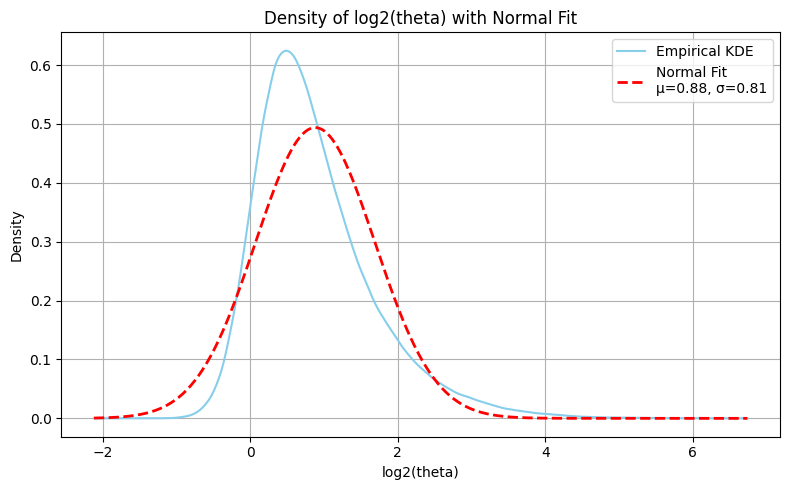

sigma:0.808042888742301, mu:0.8787932446964635


In [11]:
from scipy.stats import gaussian_kde, lognorm, norm
import numpy as np
import matplotlib.pyplot as plt


kde = gaussian_kde(df['log2_theta'])
x_vals = np.linspace(df['log2_theta'].min(), df['log2_theta'].max(), 500)
kde_vals = kde(x_vals)

# normal fit
mu, sigma = norm.fit(df['log2_theta'])
pdf_vals = norm.pdf(x_vals, loc=mu, scale=sigma)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals, kde_vals, label='Empirical KDE', color='skyblue')
plt.plot(x_vals, pdf_vals, 'r--', lw=2, label=f'Normal Fit\nμ={mu:.2f}, σ={sigma:.2f}')
plt.title("Density of log2(theta) with Normal Fit")
plt.xlabel("log2(theta)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'sigma:{sigma}, mu:{mu}')

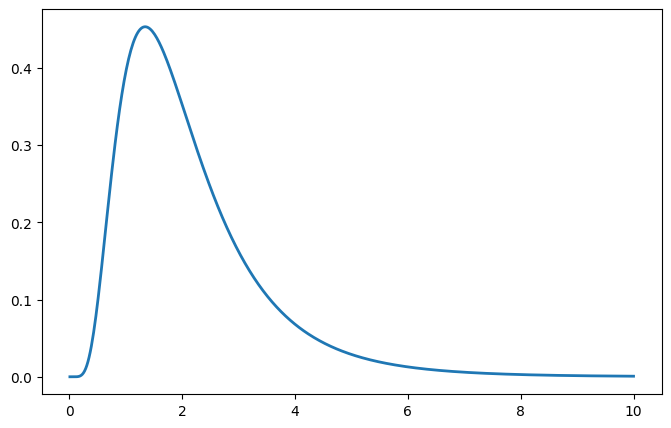

In [35]:
x = np.linspace(0.01, 10, 500)
pdf = lognorm.pdf(x, s=sigma, scale=scale)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label='lognorm(s=1, scale=exp(0))', lw=2)

In [36]:
sigma

0.5600926501032395

In [37]:
scale

1.8388365463413292

In [41]:
mu = np.log(scale)
mu

0.6091330598564797

In [ ]:
s = 1
mu = np.log(2.5)
scale = np.exp(mu)

# 2.5th and 97.5th percentiles (95% interval)
q_low, q_high = lognorm.ppf([0.025, 0.975], s=s, scale=scale)
print(f"95% of mass lies between [{q_low:.2f}, {q_high:.2f}]")

In [2]:
2**1.5

2.8284271247461903

In [12]:
np.log2(2.5)

1.3219280948873624

In [13]:
2**(0.88+0.81*3) 

9.917661599511893

In [14]:
np.log2(9.91766159951189)

3.3099999999999996

In [15]:
0.88+0.81*3

3.31